In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from nuq.dup import NuqClassifierDup


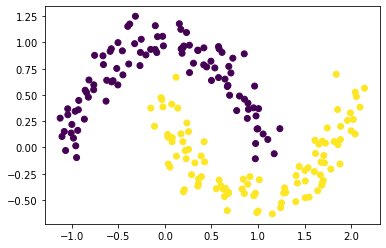

In [39]:
x, y = make_moons(200)
x += 0.1 * np.random.randn(200, 2)
plt.scatter(x[:, 0], x[:, 1], c=y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=40)

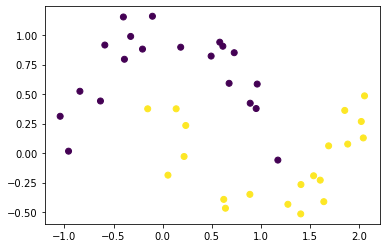

In [40]:
plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val)

initialized
fitted
(1600, 2)


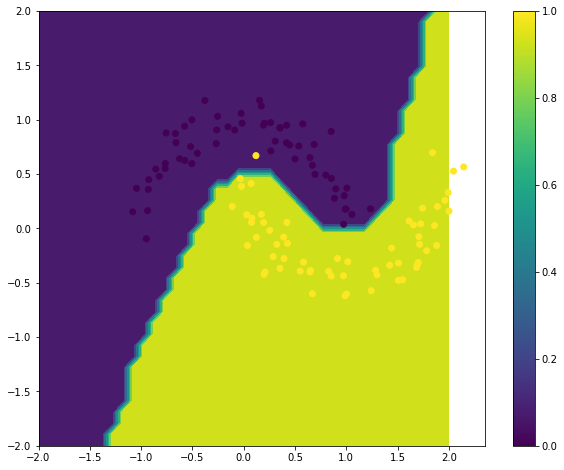

(1600, 2)


/home/beardysome/apps/nuq/nuq/dup.py:68: RuntimeWarning: invalid value encountered in true_divide


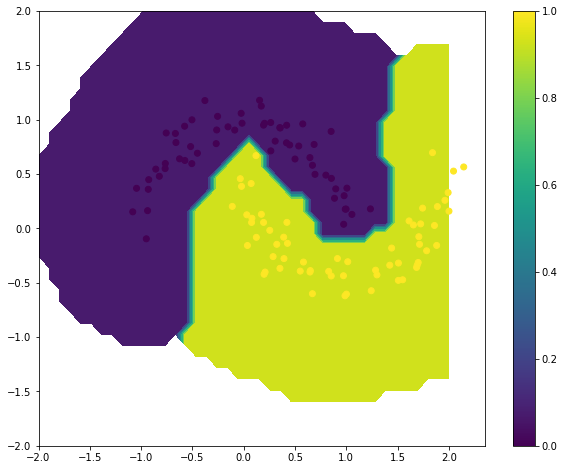

In [60]:
model = NuqClassifierDup(kernel_type='RBF')
print('initialized')

model.fit(x_train, y_train)
print('fitted')

fig_size = (10, 8
            )

x_mesh = np.array(np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)
print(x_mesh.shape)
prediction_mesh, uncertainty = model.predict(x_mesh)
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.colorbar()
plt.show()


model.kernel.gamma = 100
x_mesh = np.array(np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)
print(x_mesh.shape)
prediction_mesh, uncertainty = model.predict(x_mesh)
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.colorbar()